In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import pickle

In [11]:
import sys
module_path = '/Users/junhaoxiong 1/Documents/Projects/mgcpy'
if module_path not in sys.path:
    sys.path.append(module_path)
from mgcpy.independence_tests.dcorr import DCorr
from mgcpy.benchmarks.power import power
from mgcpy.benchmarks.simulations import linear_sim, quad_sim, ubern_sim, exp_sim, w_sim, joint_sim, spiral_sim, two_parab_sim
from mgcpy.independence_tests.mgc.mgc import MGC
from mgcpy.independence_tests.rv_corr import RVCorr
from mgcpy.independence_tests.hhg import HHG
from mgcpy.independence_tests.kendall_spearman import KendallSpearman

In [3]:
def compute_distance_matrix(data_matrix_X, data_matrix_Y):
    # obtain the pairwise distance matrix for X and Y
    dist_mtx_X = squareform(pdist(data_matrix_X, metric='euclidean'))
    dist_mtx_Y = squareform(pdist(data_matrix_Y, metric='euclidean'))
    return (dist_mtx_X, dist_mtx_Y)

In [4]:
def power_vs_dimension(independence_test, simulation_type, dim_range):
    '''
    Generate power of an independence test given a simulation for a range of dimensions
    
    :param independence_test: an independence_test object
    :param simulation_type: a simulation function from mgcpy.benchmarks.simulations
    :param dim_range: the upper end of the range of dimension
    :return: power for each dimension
    '''
    estimated_power = np.zeros(dim_range)
    for d in range(1, dim_range+1):
        estimated_power[d-1] = power(independence_test, simulation_type, num_samples=100, num_dimensions=d)
    return estimated_power

In [5]:
def compute_all_power(simulation_type, dim_range):
    '''
    Compute power for each independence test for each dimension in a specified range 
    '''

    '''
    Initialize all independence test objects
    Data matrices initialized to np.nan, because in power computation each repeats involves generating new samples
    '''
    mcorr = DCorr(data_matrix_X=np.nan, data_matrix_Y=np.nan,
                  compute_distance_matrix=compute_distance_matrix, corr_type='mcorr')
    dcorr = DCorr(data_matrix_X=np.nan, data_matrix_Y=np.nan,
                  compute_distance_matrix=compute_distance_matrix, corr_type='dcorr')
    mantel = DCorr(data_matrix_X=np.nan, data_matrix_Y=np.nan,
                  compute_distance_matrix=compute_distance_matrix, corr_type='mantel')
    mgc = MGC(data_matrix_X=np.nan, data_matrix_Y=np.nan, compute_distance_matrix=compute_distance_matrix)
    rv_corr = RVCorr(data_matrix_X=np.nan, data_matrix_Y=np.nan, compute_distance_matrix=compute_distance_matrix)
    hhg = HHG(data_matrix_X=np.nan, data_matrix_Y=np.nan, compute_distance_matrix=compute_distance_matrix)
    
    independence_tests = {'MGC': mgc, 'MCorr': mcorr, 'DCorr': dcorr, 'Mantel': mantel, 'RV Corr': rv_corr} 
                          #'HHG': hhg, 'Kendall Spearman': ks}
    power_results = {}
    
    # compute power for each test for each dimension
    for name, test in independence_tests.items():
        power = power_vs_dimension(test, simulation_type, dim_range)
        power_results[name] = power
        print('{} finished'.format(name))
    
    return power_results

In [17]:
def plot_power_curve(power_results, simulation_name):
    '''
    Plot the power of each independence test relative to mgc
    '''
    mgc_power = power_results['MGC']

    for name, power in power_results.items():     
        plt.plot(power-mgc_power, label=name)
   
    plt.xlabel('Dimensions')
    plt.ylabel('Power Relative to MGC')
    plt.legend()
    plt.gca().set_xlim(1, mgc_power.shape[0]+1)
    plt.xticks(np.arange(1, mgc_power.shape[0]+1))
    plt.title('Power \n Data: {} Simulation, 100 samples, noise=0'.format(simulation_name))
    plt.show()

In [21]:
%%time
power_results = compute_all_power(w_sim, 20)

MGC finished
MCorr finished
DCorr finished
Mantel finished
RV Corr finished
CPU times: user 29min 6s, sys: 23 s, total: 29min 29s
Wall time: 29min 47s


In [22]:
power_results

{'DCorr': array([1.   , 0.993, 0.852, 0.71 , 0.499, 0.392, 0.38 , 0.328, 0.342,
        0.278, 0.212, 0.214, 0.265, 0.227, 0.211, 0.209, 0.158, 0.213,
        0.164, 0.166]),
 'MCorr': array([1.   , 0.928, 0.632, 0.478, 0.367, 0.306, 0.267, 0.21 , 0.199,
        0.173, 0.194, 0.167, 0.16 , 0.159, 0.123, 0.132, 0.132, 0.102,
        0.113, 0.12 ]),
 'MGC': array([1.   , 1.   , 1.   , 0.974, 0.909, 0.868, 0.848, 0.791, 0.745,
        0.702, 0.608, 0.586, 0.561, 0.507, 0.468, 0.478, 0.403, 0.388,
        0.405, 0.349]),
 'Mantel': array([0.949, 1.   , 0.996, 0.97 , 0.908, 0.837, 0.741, 0.737, 0.619,
        0.573, 0.52 , 0.487, 0.438, 0.448, 0.453, 0.351, 0.377, 0.36 ,
        0.38 , 0.303]),
 'RV Corr': array([0.864, 0.885, 0.729, 0.668, 0.541, 0.488, 0.451, 0.436, 0.38 ,
        0.374, 0.35 , 0.326, 0.354, 0.297, 0.318, 0.257, 0.263, 0.264,
        0.23 , 0.196])}

In [19]:
#power_results = pickle.load(open('../../NeuroData/power_curve_quadratic.pkl', 'rb'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='../../NeuroData/power_curve_quadratic.pkl'>
  """Entry point for launching an IPython kernel.


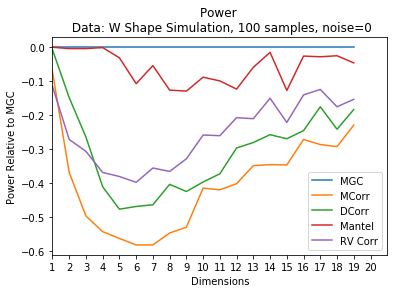

CPU times: user 161 ms, sys: 34.6 ms, total: 196 ms
Wall time: 198 ms


In [23]:
%%time
plot_power_curve(power_results, 'W Shape')

In [24]:
pickle.dump(power_results, open('../../NeuroData/power_curve_W.pkl', 'wb'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedWriter name='../../NeuroData/power_curve_W.pkl'>
  """Entry point for launching an IPython kernel.
